In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight') # For plots

In [ ]:
pjme=pd.read_csv('/content/PJME_hourly.csv',index_col=[0], parse_dates=[0]) # We set the index column and know its dates

In [ ]:
print(pjme.head())
print(pjme.tail())
print(pjme.info())
print(pjme.describe())

                     PJME_MW
Datetime                    
2002-12-31 01:00:00  26498.0
2002-12-31 02:00:00  25147.0
2002-12-31 03:00:00  24574.0
2002-12-31 04:00:00  24393.0
2002-12-31 05:00:00  24860.0
                     PJME_MW
Datetime                    
2018-01-01 20:00:00  44284.0
2018-01-01 21:00:00  43751.0
2018-01-01 22:00:00  42402.0
2018-01-01 23:00:00  40164.0
2018-01-02 00:00:00  38608.0
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145366 entries, 2002-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   PJME_MW  145366 non-null  float64
dtypes: float64(1)
memory usage: 2.2 MB
None
             PJME_MW
count  145366.000000
mean    32080.222831
std      6464.012166
min     14544.000000
25%     27573.000000
50%     31421.000000
75%     35650.000000
max     62009.000000


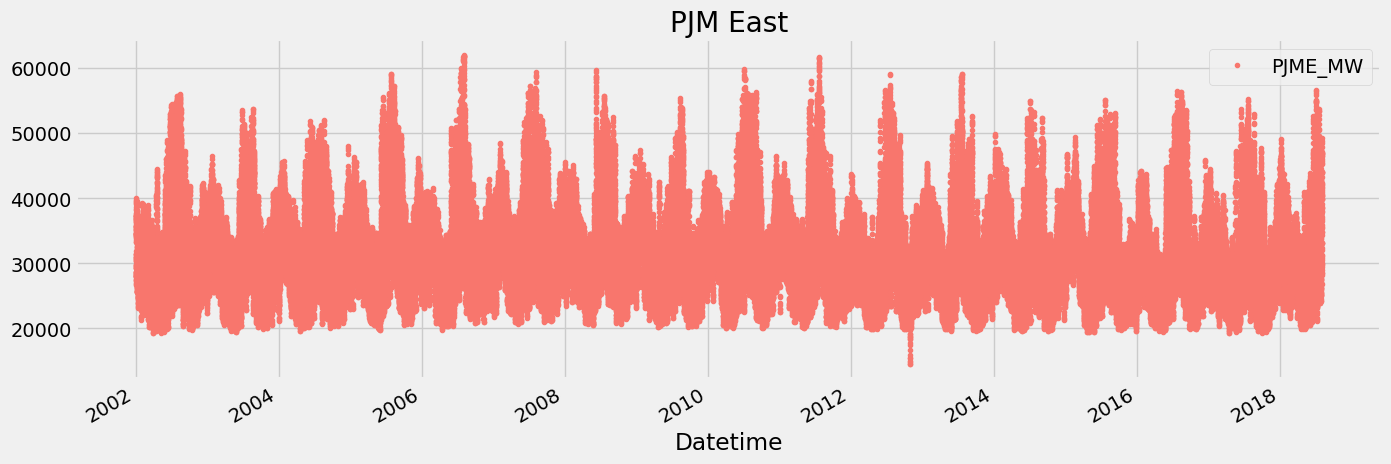

In [ ]:
# Color pallete for plotting
color_pl=["#F8766D","#D39200","#93AA00","#00BA38","#00C19F","#00B9E3","#619CFF","#DB72FB"]

pjme.plot(style='.',figsize=(15,5),color=color_pl[0],title='PJM East')
plt.show()

In [ ]:
#EDA
def create_features(df, label=None):
  """
  Creates time series features from datetime index.
  """
  df = data.copy()
  df['date'] = df.index
  df['hour'] = df['date'].dt.hour
  df['dayofweek'] = df['date'].dt.dayofweek
  df['quarter'] = df['date'].dt.quarter
  df['month'] = df['date'].dt.month
  df['year'] = df['date'].dt.year
  df['dayofyear'] = df['date'].dt.dayofyear
  df['dayofmonth'] = df['date'].dt.day
  df['weekofyear'] = df['date'].dt.isocalendar().week

  X= data[['Hour','dayofweek', 'quarter', 'month', 'year','dayofyear','dayofmonth','weekofyear']]
  if label:
       y = data[label]
       return X, y
  return X
x, y = create_features(data, label='Mobile Payments')
features_and_target = pd.concat([x, y], axis=1)


In [ ]:
# See our features and target
features_and_target.head()

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,PJME_MW
Datetime,,,,,,,,,
2002-12-31 01:00:00,1,1,4,12,2002,365,31,1,26498.0
2002-12-31 02:00:00,2,1,4,12,2002,365,31,1,25147.0
2002-12-31 03:00:00,3,1,4,12,2002,365,31,1,24574.0
2002-12-31 04:00:00,4,1,4,12,2002,365,31,1,24393.0
2002-12-31 05:00:00,5,1,4,12,2002,365,31,1,24860.0


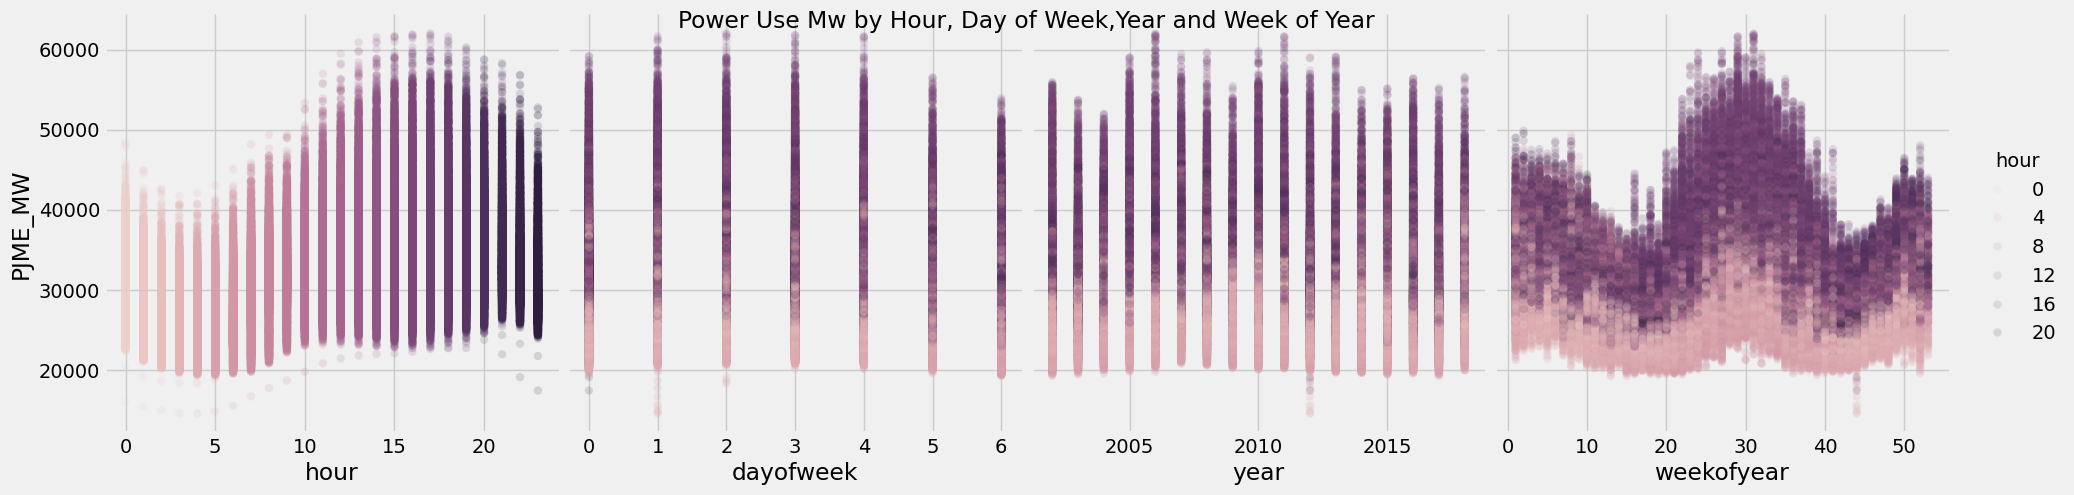

In [ ]:
sns.pairplot(features_and_target.dropna(),
             hue='hour',
             x_vars=['hour','dayofweek',
                     'year','weekofyear'],
             y_vars=['PJME_MW'],
             height=5,
             plot_kws={'alpha':0.15,'linewidth':0}
             )
plt.suptitle('Power Use Mw by Hour, Day of Week,Year and Week of Year')
plt.show()

In [ ]:
split_date='01-jan-2015'
pjme_train=pjme.loc[pjme.index <= split_date].copy()
pjme_test=pjme.loc[pjme.index > split_date].copy()

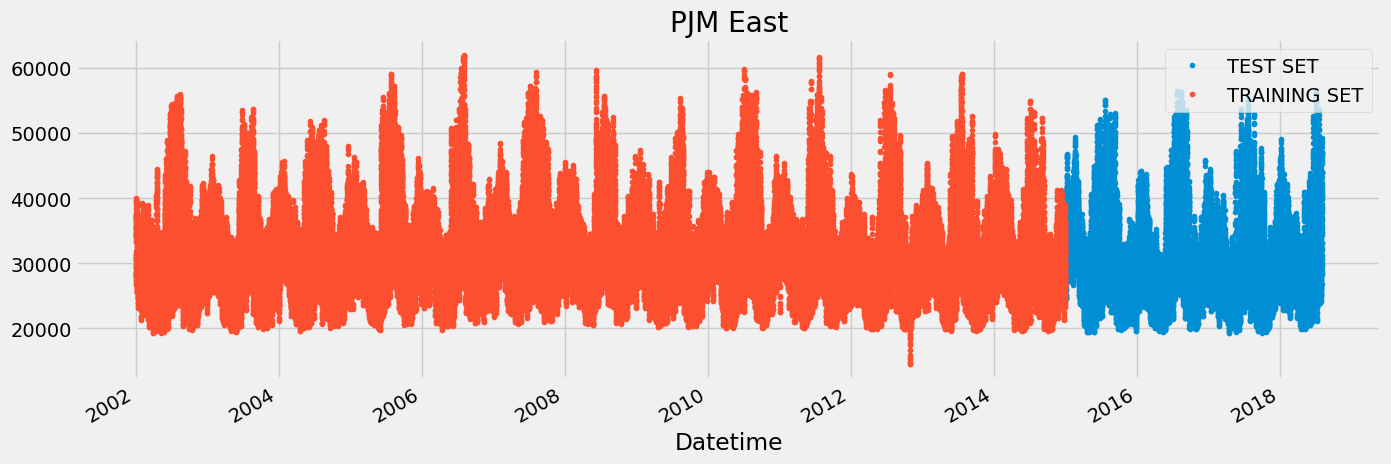

In [ ]:
# Plot train and test so you can see where we have split
pjme_test \
     .rename(columns={'PJME_MW':'TEST SET'})\
     .join(pjme_train.rename(columns={'PJME_MW':'TRAINING SET'}),
           how='outer') \
     .plot(figsize=(15,5),title='PJM East', style='.')
plt.show()

In [ ]:
# Format data for phrophet model using ds and y
pjme_train.reset_index() \
     .rename(columns={'Datetime':'ds',
                      'PJME_MW':'y'}).head()

,ds,y
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [ ]:
# Setup and train model and fit
model= Prophet()
model.fit(pjme_train.reset_index() \
          .rename(columns={'Datetime':'ds',
                           'PJME_MW': 'y'}))

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4m8fdfqo/zxza_n44.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4m8fdfqo/9bkwersg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67276', 'data', 'file=/tmp/tmp4m8fdfqo/zxza_n44.json', 'init=/tmp/tmp4m8fdfqo/9bkwersg.json', 'output', 'file=/tmp/tmp4m8fdfqo/prophet_modeltur4q8tw/prophet_model-20250323132828.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:28:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:29:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Predict on training set with model
pjme_test_fcst=model.predict(pjme_test.reset_index() \
                             .rename(columns={'Datetime':'ds'}))

In [ ]:
pjme_test_fcst.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01 01:00:00,31210.530967,23748.762958,32423.386980,31210.530967,31210.530967,-2893.742472,-2893.742472,-2893.742472,-4430.272423,...,1281.328732,1281.328732,1281.328732,255.201219,255.201219,255.201219,0.0,0.0,0.0,28316.788495
1,2015-01-01 02:00:00,31210.494154,22728.962095,31430.867859,31210.494154,31210.494154,-4398.239425,-4398.239425,-4398.239425,-5927.272577,...,1272.574102,1272.574102,1272.574102,256.459050,256.459050,256.459050,0.0,0.0,0.0,26812.254729
2,2015-01-01 03:00:00,31210.457342,21520.226670,30367.592555,31210.457342,31210.457342,-5269.974485,-5269.974485,-5269.974485,-6790.346308,...,1262.613389,1262.613389,1262.613389,257.758434,257.758434,257.758434,0.0,0.0,0.0,25940.482857
3,2015-01-01 04:00:00,31210.420529,21291.353904,29964.171206,31210.420529,31210.420529,-5411.456410,-5411.456410,-5411.456410,-6922.126021,...,1251.570211,1251.570211,1251.570211,259.099400,259.099400,259.099400,0.0,0.0,0.0,25798.964119
4,2015-01-01 05:00:00,31210.383716,22053.851773,31006.507025,31210.383716,31210.383716,-4737.018106,-4737.018106,-4737.018106,-6237.080479,...,1239.580401,1239.580401,1239.580401,260.481971,260.481971,260.481971,0.0,0.0,0.0,26473.365610


In [ ]:
# Plot the forecarst
f,ax=plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig=model.plot(pjme_test_fcst,
               ax=ax)
plt.show()

AttributeError: 'Text' object has no attribute 'subplots'

In [ ]:
# Look at first month of predictions
# Plot the forecast with thw actulas
f,ax=plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(pjme_test.index,pjme_test['PJME_MW'],color='r')
fig=model.plot(pjme_test_fcst,ax=ax)
# Convert the string dates to pandas Timestamp objects
ax.set_xbound(lower=pd.Timestamp('01-01-2015'),
              upper=pd.Timestamp('02-01-2015'))
ax.set_ylim(0,60000)
plt=plt.suptitle('January 2015 Forecast vs Actuals')

AttributeError: 'Text' object has no attribute 'subplots'

In [ ]:
# Single week prediction
# Plot the forecast with actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(pjme_test.index, pjme_test['PJME_MW'], color='r')
fig = model.plot(pjme_test_fcst, ax=ax)
# Convert the string dates to pandas Timestamp objects for xbound
ax.set_xbound(lower=pd.Timestamp('01-01-2015'), upper=pd.Timestamp('01-08-2015'))
ax.set_ylim(0, 60000)
plt.suptitle('First Week of January 2015 Forecast vs Actuals')
plt.show()

AttributeError: 'Text' object has no attribute 'subplots'

In [ ]:
# Error Metric
mean_squared_error(y_true=pjme_test['PJME_MW'],
                   y_pred=pjme_test_fcst['yhat'])

43784240.02744754

In [ ]:
mean_absolute_error(y_true=pjme_test['PJME_MW'],
                    y_pred=pjme_test_fcst['yhat'])

5181.911537928106

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): # Calculates Mape given y_true and y_pred
    y_true,y_pred=np.array(y_true),np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

mean_absolute_percentage_error(y_true=pjme_test['PJME_MW'],
                                y_pred=pjme_test_fcst['yhat'])

np.float64(16.512003880182647)

In [ ]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
cal = calendar()
train_holidays=cal.holidays(start=pjme_train.index.min(),
                             end=pjme_train.index.max())
train_holidays=cal.holidays(start=pjme_train.index.min(),
                             end=pjme_train.index.max())

In [ ]:
# Create dataframe with holiday, ds columns;
pjme['date'] = pjme.index.date
pjme['is_holiday'] = pjme.date.isin([d.date() for d in cal.holidays()])
holiday_df=pjme.loc[pjme['is_holiday']] \
      .reset_index() \
      .rename(columns={'Datetime':'ds'})
holiday_df['holiday']='USFederalHoliday'
holiday_df=holiday_df.drop(['PJME_MW','date','is_holiday'],axis=1)
holiday_df.head()

,ds,holiday
0,2003-01-01 00:00:00,USFederalHoliday
1,2002-12-25 01:00:00,USFederalHoliday
2,2002-12-25 02:00:00,USFederalHoliday
3,2002-12-25 03:00:00,USFederalHoliday
4,2002-12-25 04:00:00,USFederalHoliday


In [ ]:
holiday_df['ds']=pd.to_datetime(holiday_df['ds'])

In [ ]:
# Setup and train model with holidays
model_with_holidays=Prophet(holidays=holiday_df)
model_with_holidays.fit(pjme_train.reset_index() \
                        .rename(columns={'Datetime':'ds',
                                         'PJME_MW':'y'}))

DEBUG:cmdstanpy:input tempfile: /tmp/tmpmaamnwh2/25rb7f8l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmaamnwh2/r6dx4c63.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20216', 'data', 'file=/tmp/tmpmaamnwh2/25rb7f8l.json', 'init=/tmp/tmpmaamnwh2/r6dx4c63.json', 'output', 'file=/tmp/tmpmaamnwh2/prophet_modelt30fmul_/prophet_model-20250321120747.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:07:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:09:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Predict with Holidays
# .1 Predict on training set with model
pjme_test_fcst_with_hols= \
     model_with_holidays.predict(df=pjme_test.reset_index() \
                                 .rename(columns={'Datetime':'ds'}))

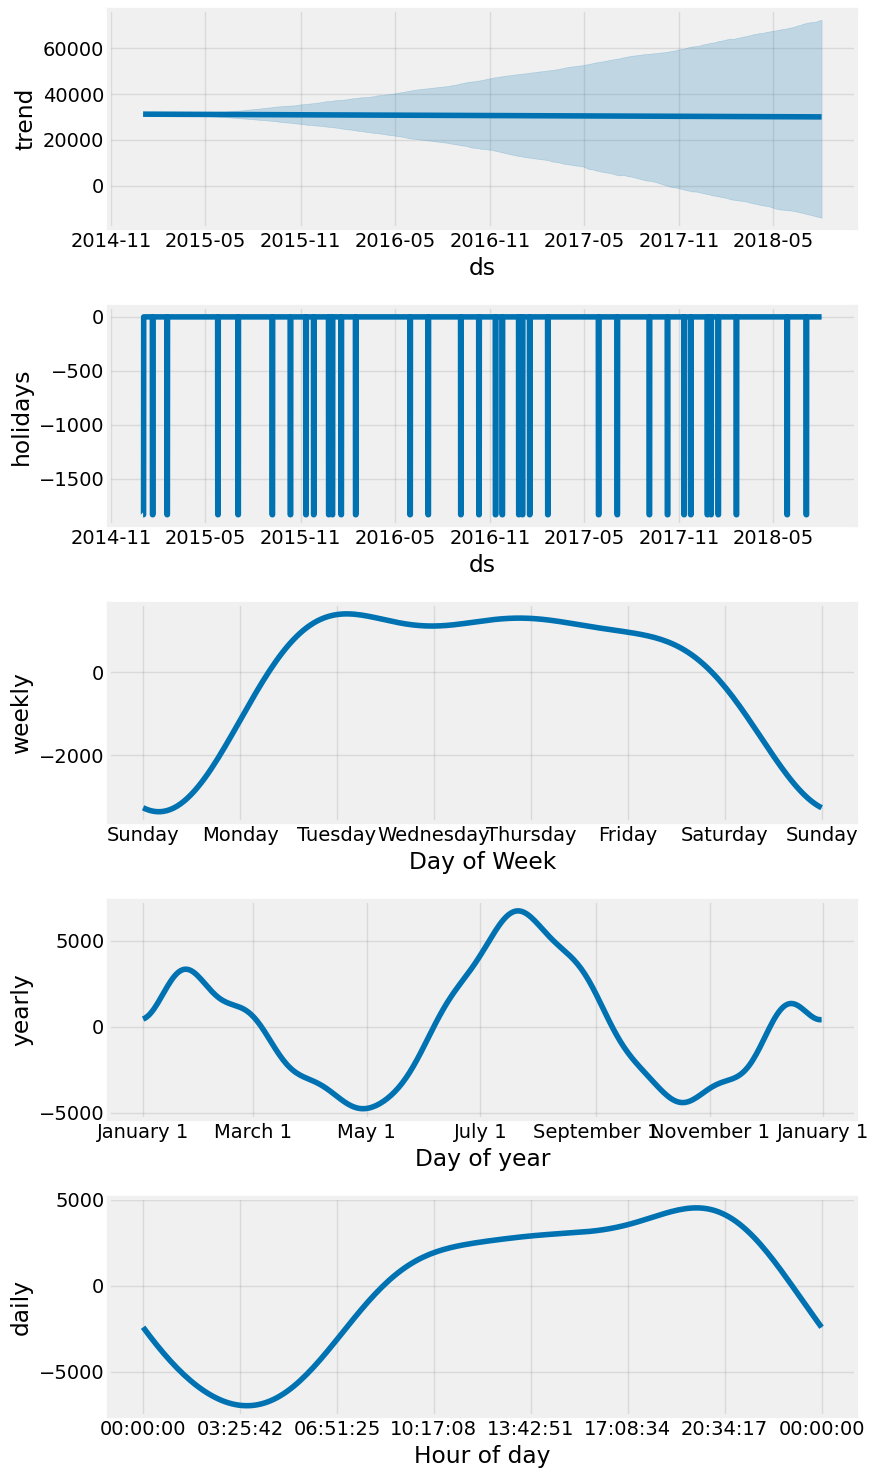

In [ ]:
# Plot Holiday Effect
fig2=model_with_holidays.plot_components(pjme_test_fcst_with_hols)

In [ ]:
# Error Metrics with Holidays Added
mean_squared_error(y_true=pjme_test['PJME_MW'],
                   y_pred=pjme_test_fcst_with_hols['yhat'])

43957492.85018296

In [ ]:
mean_absolute_error(y_true=pjme_test['PJME_MW'],
                    y_pred=pjme_test_fcst_with_hols['yhat'])

5192.348054859118

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): # Calculates Mape given y_true and y_pred
    y_true,y_pred=np.array(y_true),np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

mean_absolute_percentage_error(y_true=pjme_test['PJME_MW'],
                                y_pred=pjme_test_fcst_with_hols['yhat'])

np.float64(16.541420012252114)

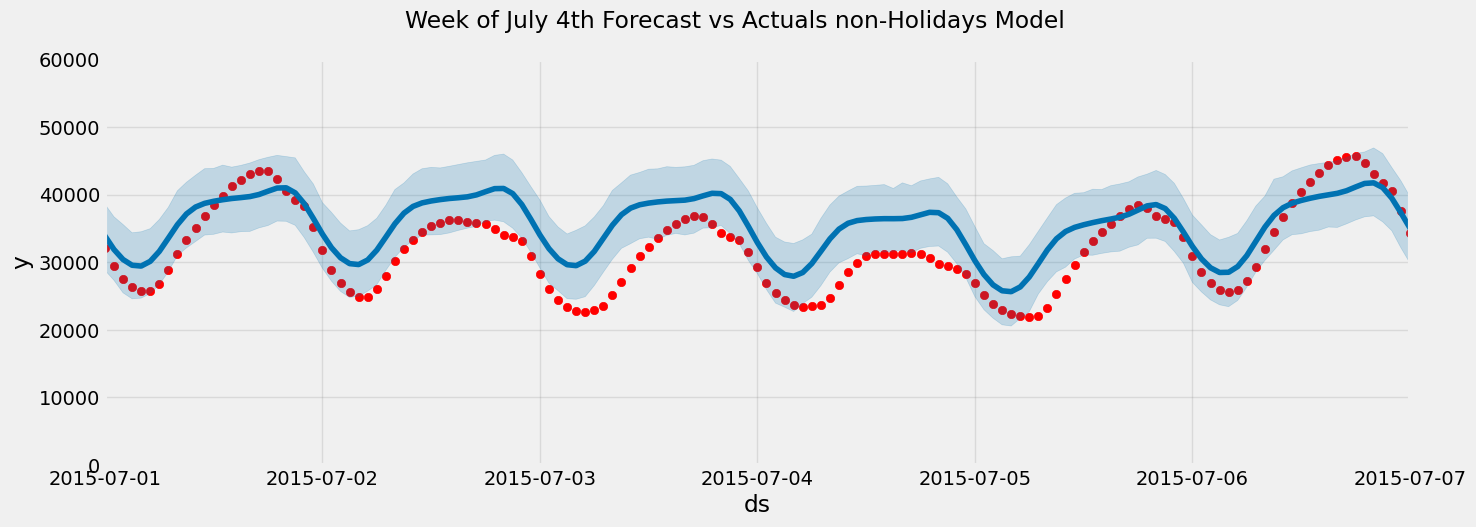

In [ ]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(pjme_test.index, pjme_test['PJME_MW'], color='r')
fig = model.plot(pjme_test_fcst, ax=ax)
ax.set_xbound(lower=pd.Timestamp('07-01-2015'), upper=pd.Timestamp('07-07-2015'))
ax.set_ylim(0, 60000)
plt.suptitle('Week of July 4th Forecast vs Actuals non-Holidays Model')
plt.show()

In [ ]:
jul4_test=pjme_test.query('Datetime >= 20160407 and Datetime < 20160408')
jul_pred=pjme_test_fcst.query('ds >= 20160407 and ds < 20160408')
jul4_pred_holiday_model=pjme_test_fcst_with_hols.query('ds >= 20160407 and ds < 20160408')

In [ ]:
mean_absolute_error(y_true=jul4_test['PJME_MW'],
                    y_pred=jul_pred['yhat'])

2156.3999535993557

In [ ]:
mean_absolute_error(y_true=jul4_test['PJME_MW'],
                    y_pred=jul4_pred_holiday_model['yhat'])

2149.495833083406

In [ ]:
holiday_list=holiday_df['ds'].tolist()

In [ ]:
hols_test=pjme_test.query('Datetime in @holiday_list')
hols_pred=pjme_test_fcst.query('ds in @holiday_list')
hols_pred_with_holiday=pjme_test_fcst_with_hols.query('ds in @holiday_list')

In [ ]:
mean_absolute_error(y_true=hols_test['PJME_MW'],
                    y_pred=hols_pred['yhat'])

5217.612940729632

In [ ]:
mean_absolute_error(y_true=hols_test['PJME_MW'],
                    y_pred=hols_pred_with_holiday['yhat'])

5115.2409876098545

In [ ]:
holiday_df['date']=holiday_df['ds'].dt.date

for hol, d in holiday_df.groupby('date'): #Removed extra space
    holiday_list=d['ds'].tolist()
    hols_test=pjme_test.query('Datetime in @holiday_list')
    if len(hols_test) == 0:
        continue
    hols_pred=pjme_test_fcst.query('ds in @holiday_list')
    hols_pred_holiday_holiday=pjme_test_fcst_with_hols.query('ds in @holiday_list') # This line assigns the predictions
    non_hol_error=mean_absolute_error(y_true=hols_test['PJME_MW'],
                                        y_pred=hols_pred['yhat'])
    hol_model_error=mean_absolute_error(y_true=hols_test['PJME_MW'],
                                        y_pred=hols_pred_holiday_holiday['yhat']) # Changed to the correct variable name
    diff=non_hol_error=hol_model_error # This line was reassigning diff and non_hol_error unintentionally

In [ ]:
Holiday: July 04, 2016:

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (<ipython-input-1-416c26321b36>, line 1)

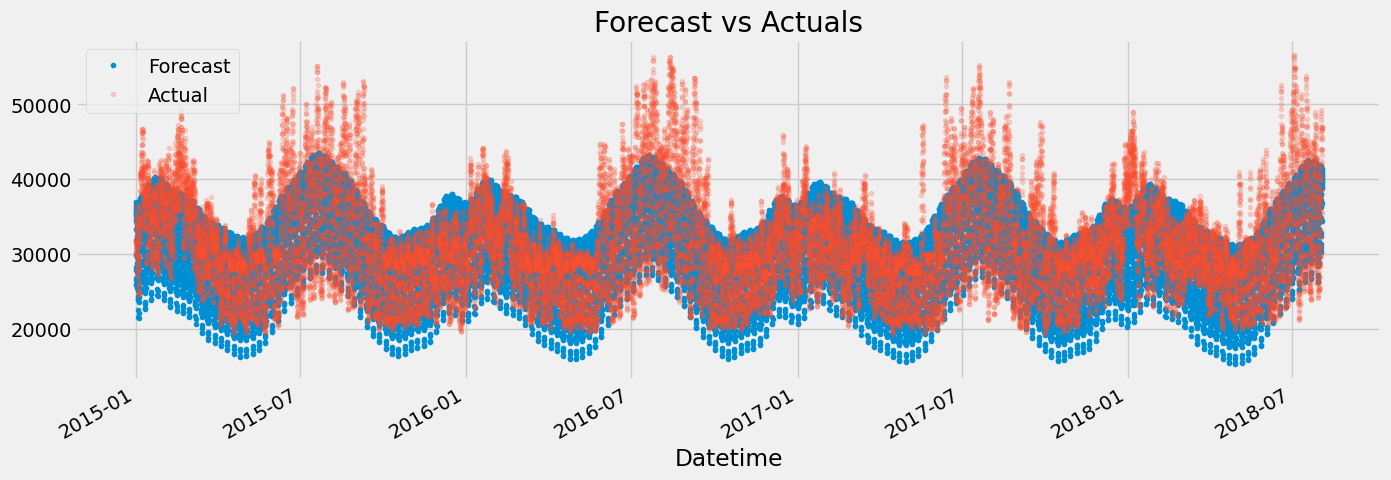

In [ ]:
ax=pjme_test_fcst.set_index('ds')['yhat'].plot(figsize=(15,5),
                                               lw=0,
                                               style='.') # Changed 'pjme_test_fsct' to 'pjme_test_fcst'
pjme_test['PJME_MW'].plot(ax=ax,
                          style='.',
                          alpha=0.2)
plt.legend(['Forecast','Actual'])
plt.title('Forecast vs Actuals')
plt.show()

In [ ]:
ax=pjme_test_fsct.set_index('ds')['yhat'].plot(figsize=(15,5),
                                               lw=0,
                                               style='.')
pjme_test['PJME_MW'].plot(ax=ax,
                          style='.',
                          alpha=0.2)
plt.legend(['Forecast','Actual'])
plt.title('Forecast vs Actuals')
plt.show

NameError: name 'pjme_test_fsct' is not defined